# Analisi dati per la Velocità della Luce 

Questo file contiene l'analisi dati dell'esperimento svolto in laboratorio per misurare la velocità della luce seguendo l'esperimento di Focault.

## Import

### Import delle librerie

In [1]:
from typing import Tuple

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scienceplots  # noqa
from colorama import Fore, Style
from scipy import stats

plt.style.use(["science", "ieee"])

### Import dei dati

In [2]:
# dati preliminari # * copiati da excel
D = 13.38833333  # m
a = 0.4826667  # m
f2 = 0.252  # m

D_err = 0.02  # m
a_err = 0.003  # m
f2_err = 0  # m

# dati delle misure
f_name = "Dati_Grezzi.xlsx"
set_names = ("CW", "CCW", "CWCCW", "CCWCW")

data_dict = dict()
for _set in set_names:
    data_dict[_set] = pd.read_excel(f_name, sheet_name=f"Exp_{_set}", header=None)
    data_dict[_set] = data_dict[_set][(data_dict[_set].T != 0).any()].T.to_numpy()

## Formule statistiche

In [4]:
def weighted_avg_and_std(values: np.ndarray, errors: np.ndarray) -> Tuple[float]:
    # Return the weighted average and standard deviation.
    weights = 1 / np.square(errors)
    average = sum(values * weights) / sum(weights)
    sigma = 1 / np.sqrt(sum(weights))
    return average, sigma

## Plot data

Mostriamo i dati raccolti per verificare che non ci siano valori a-normali nei dati.

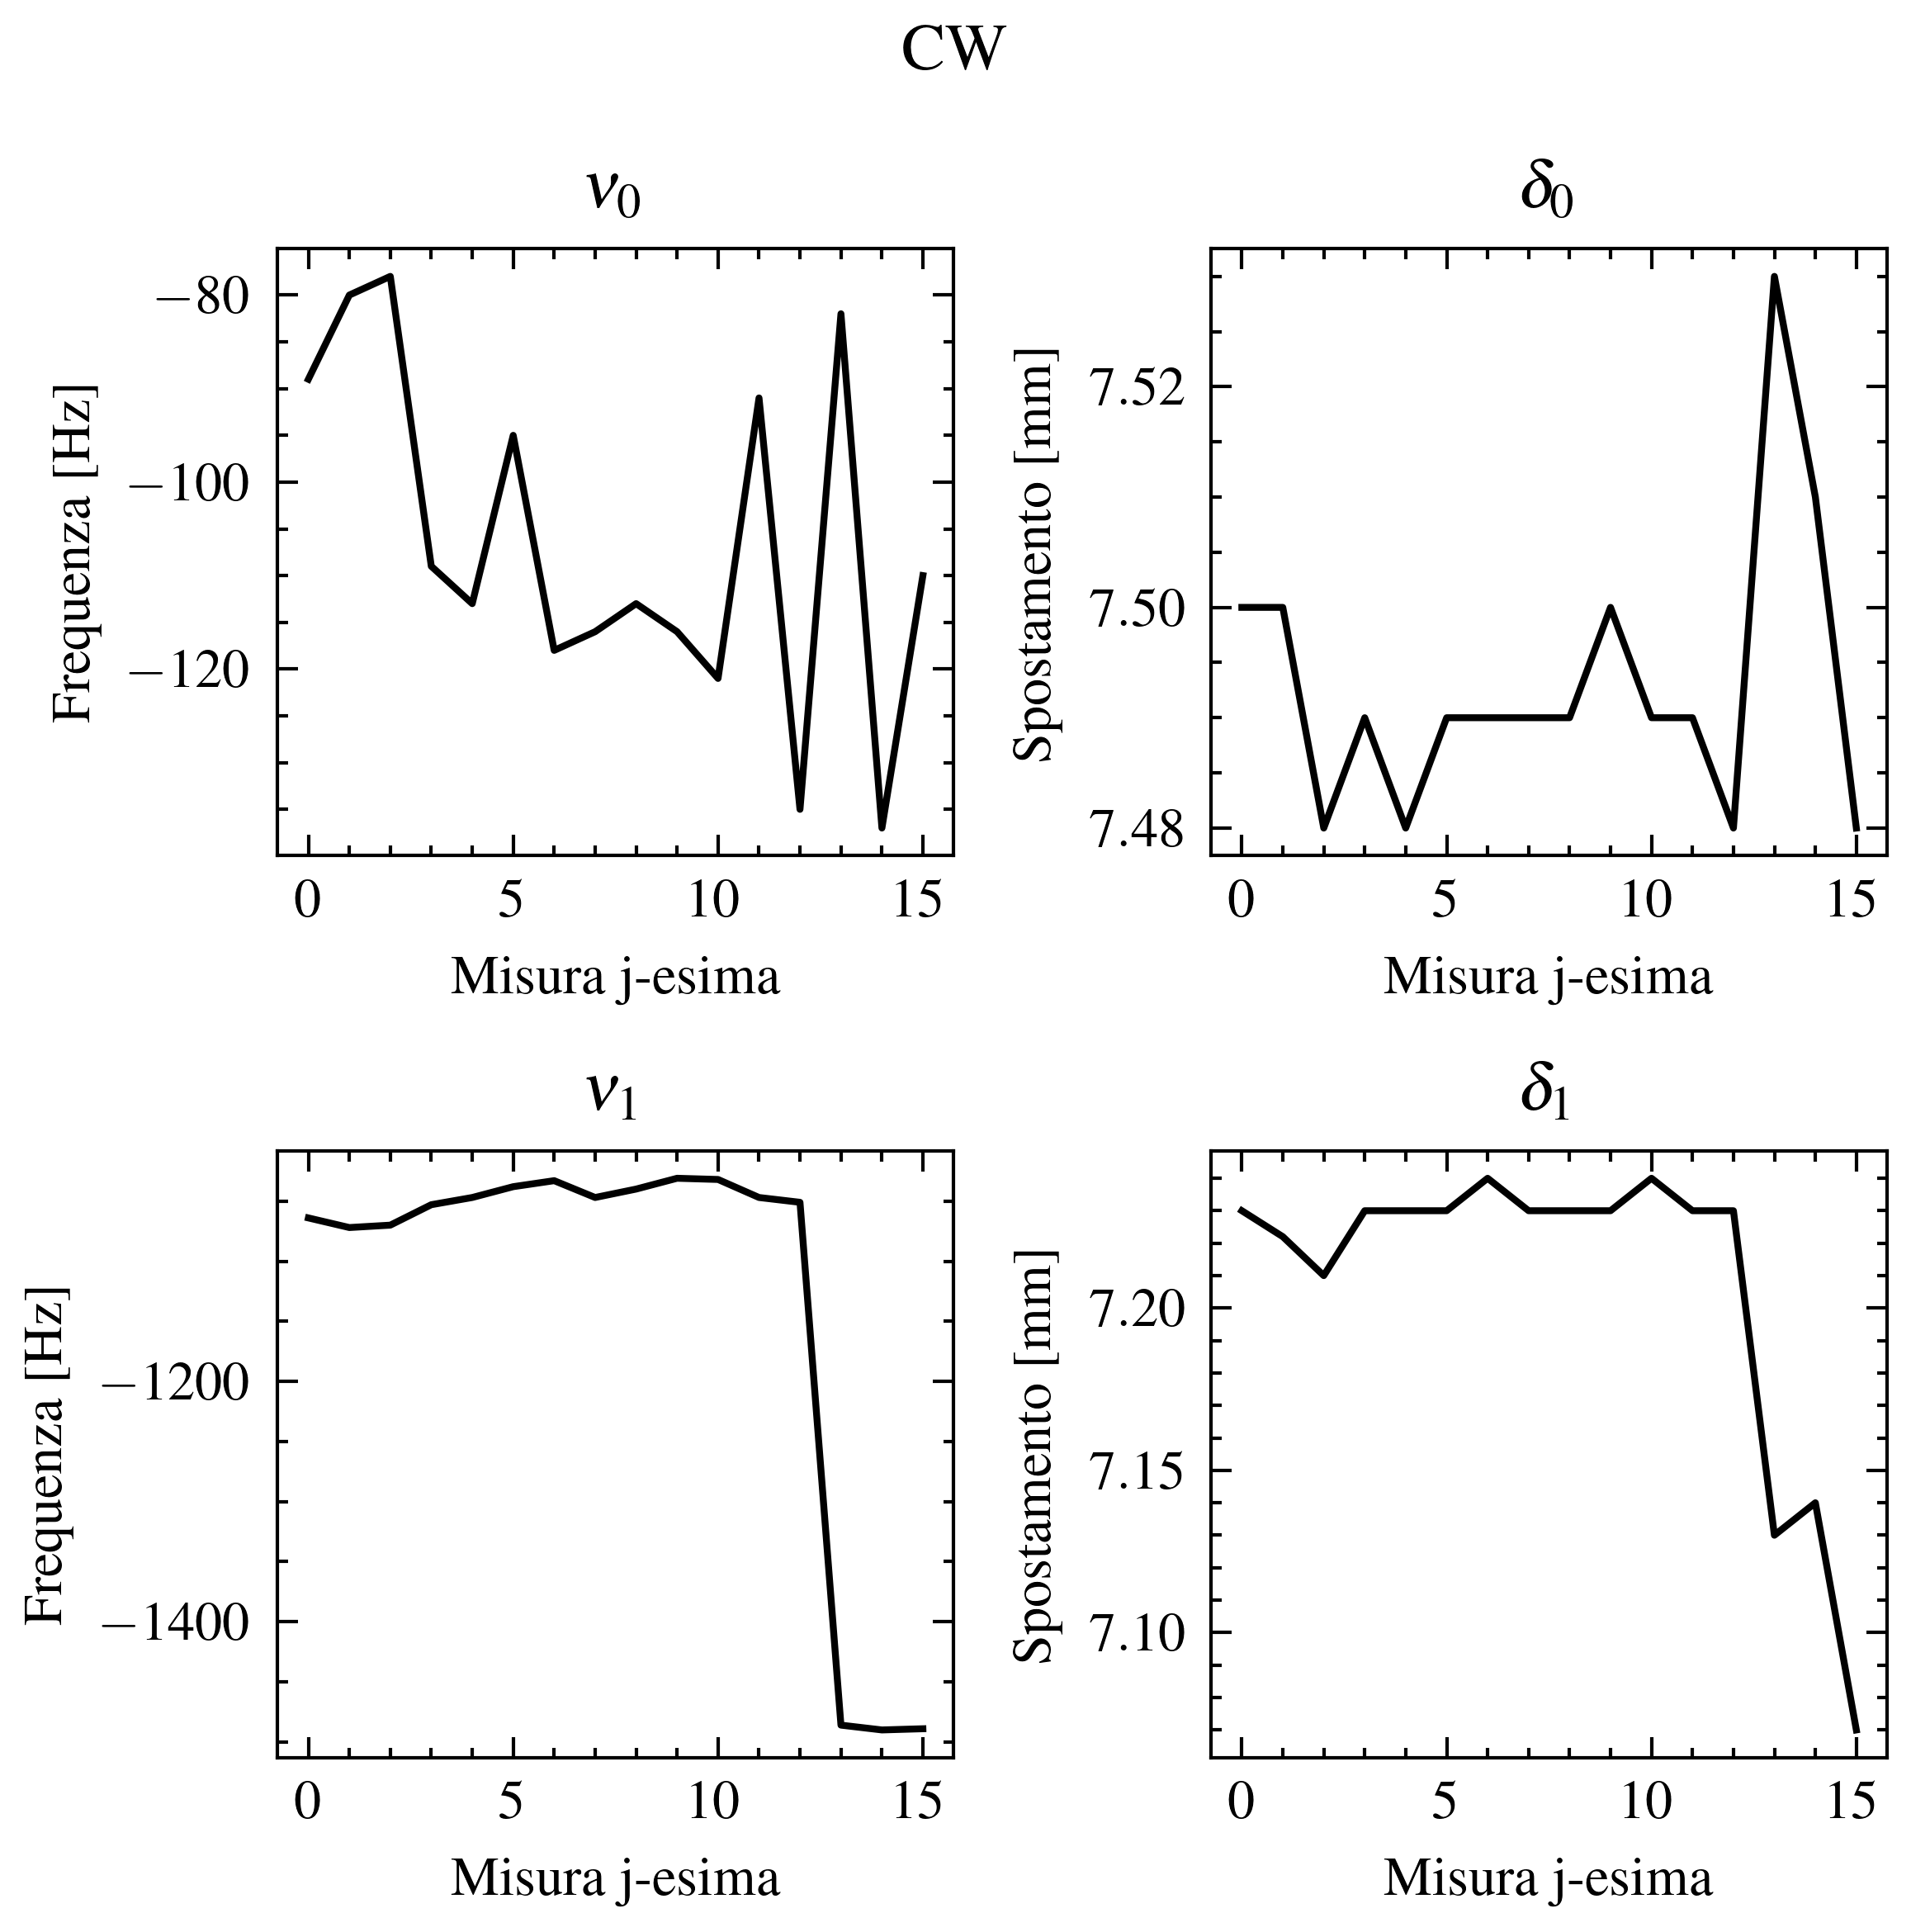

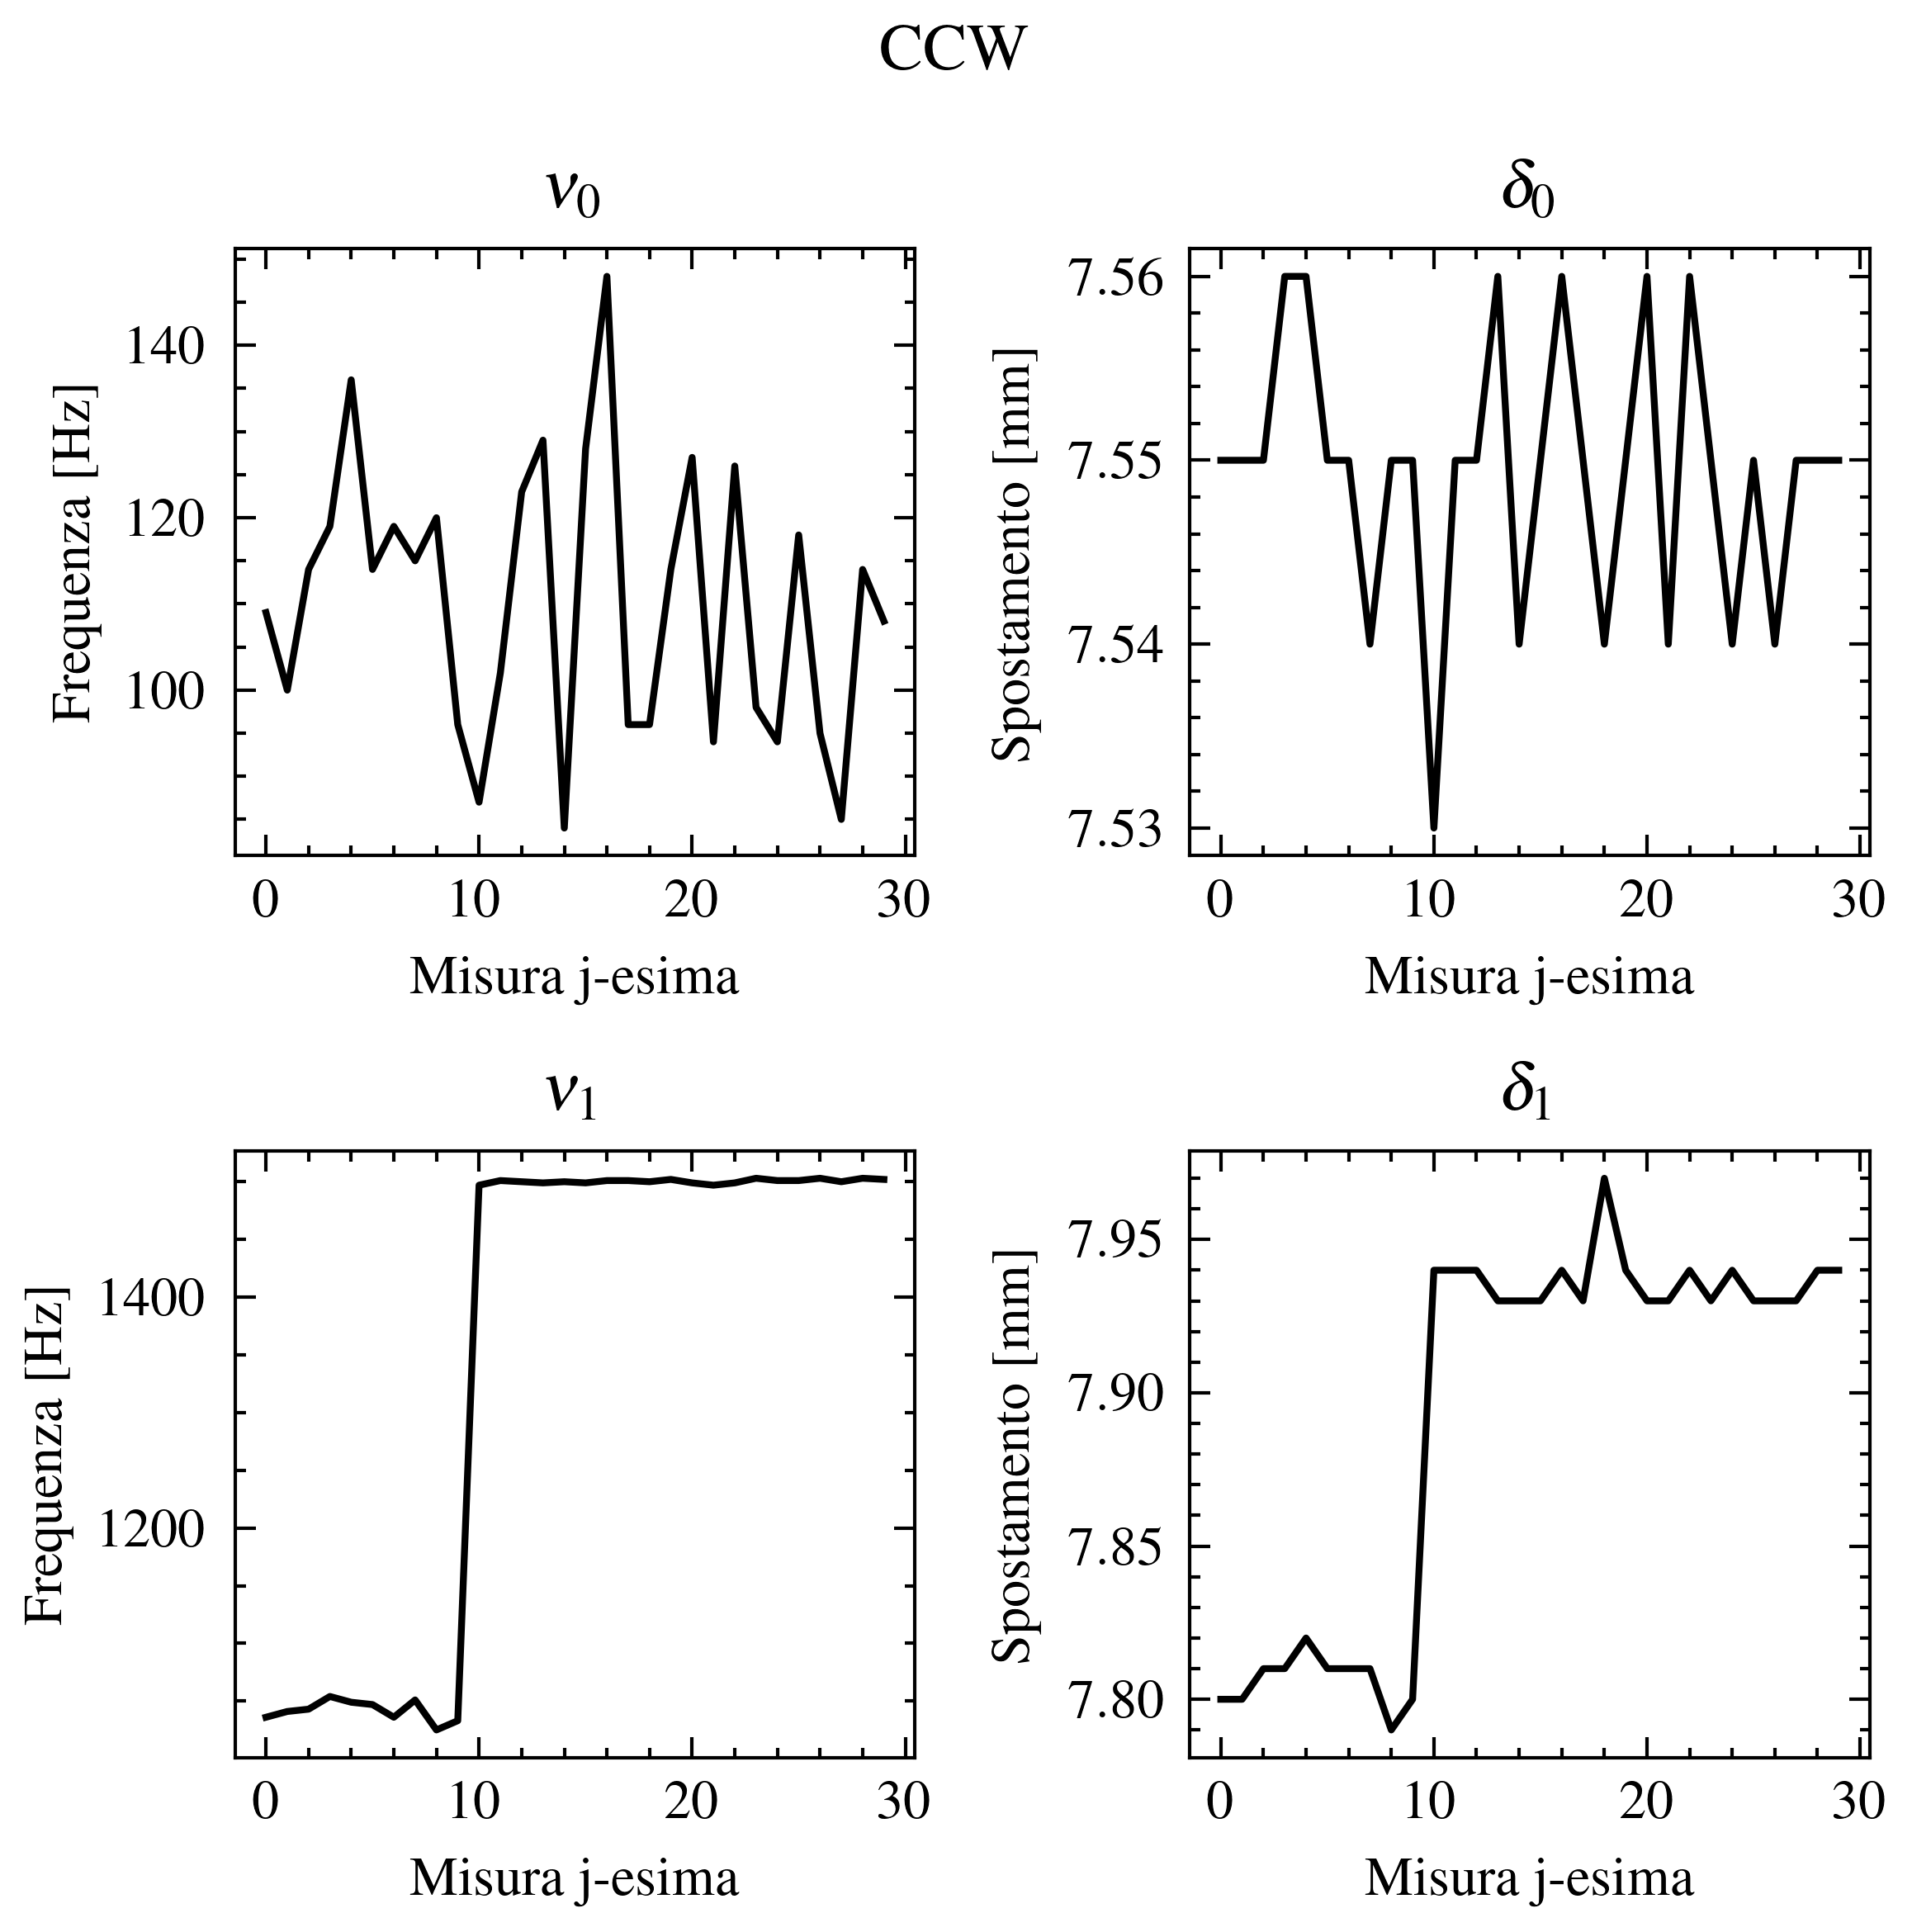

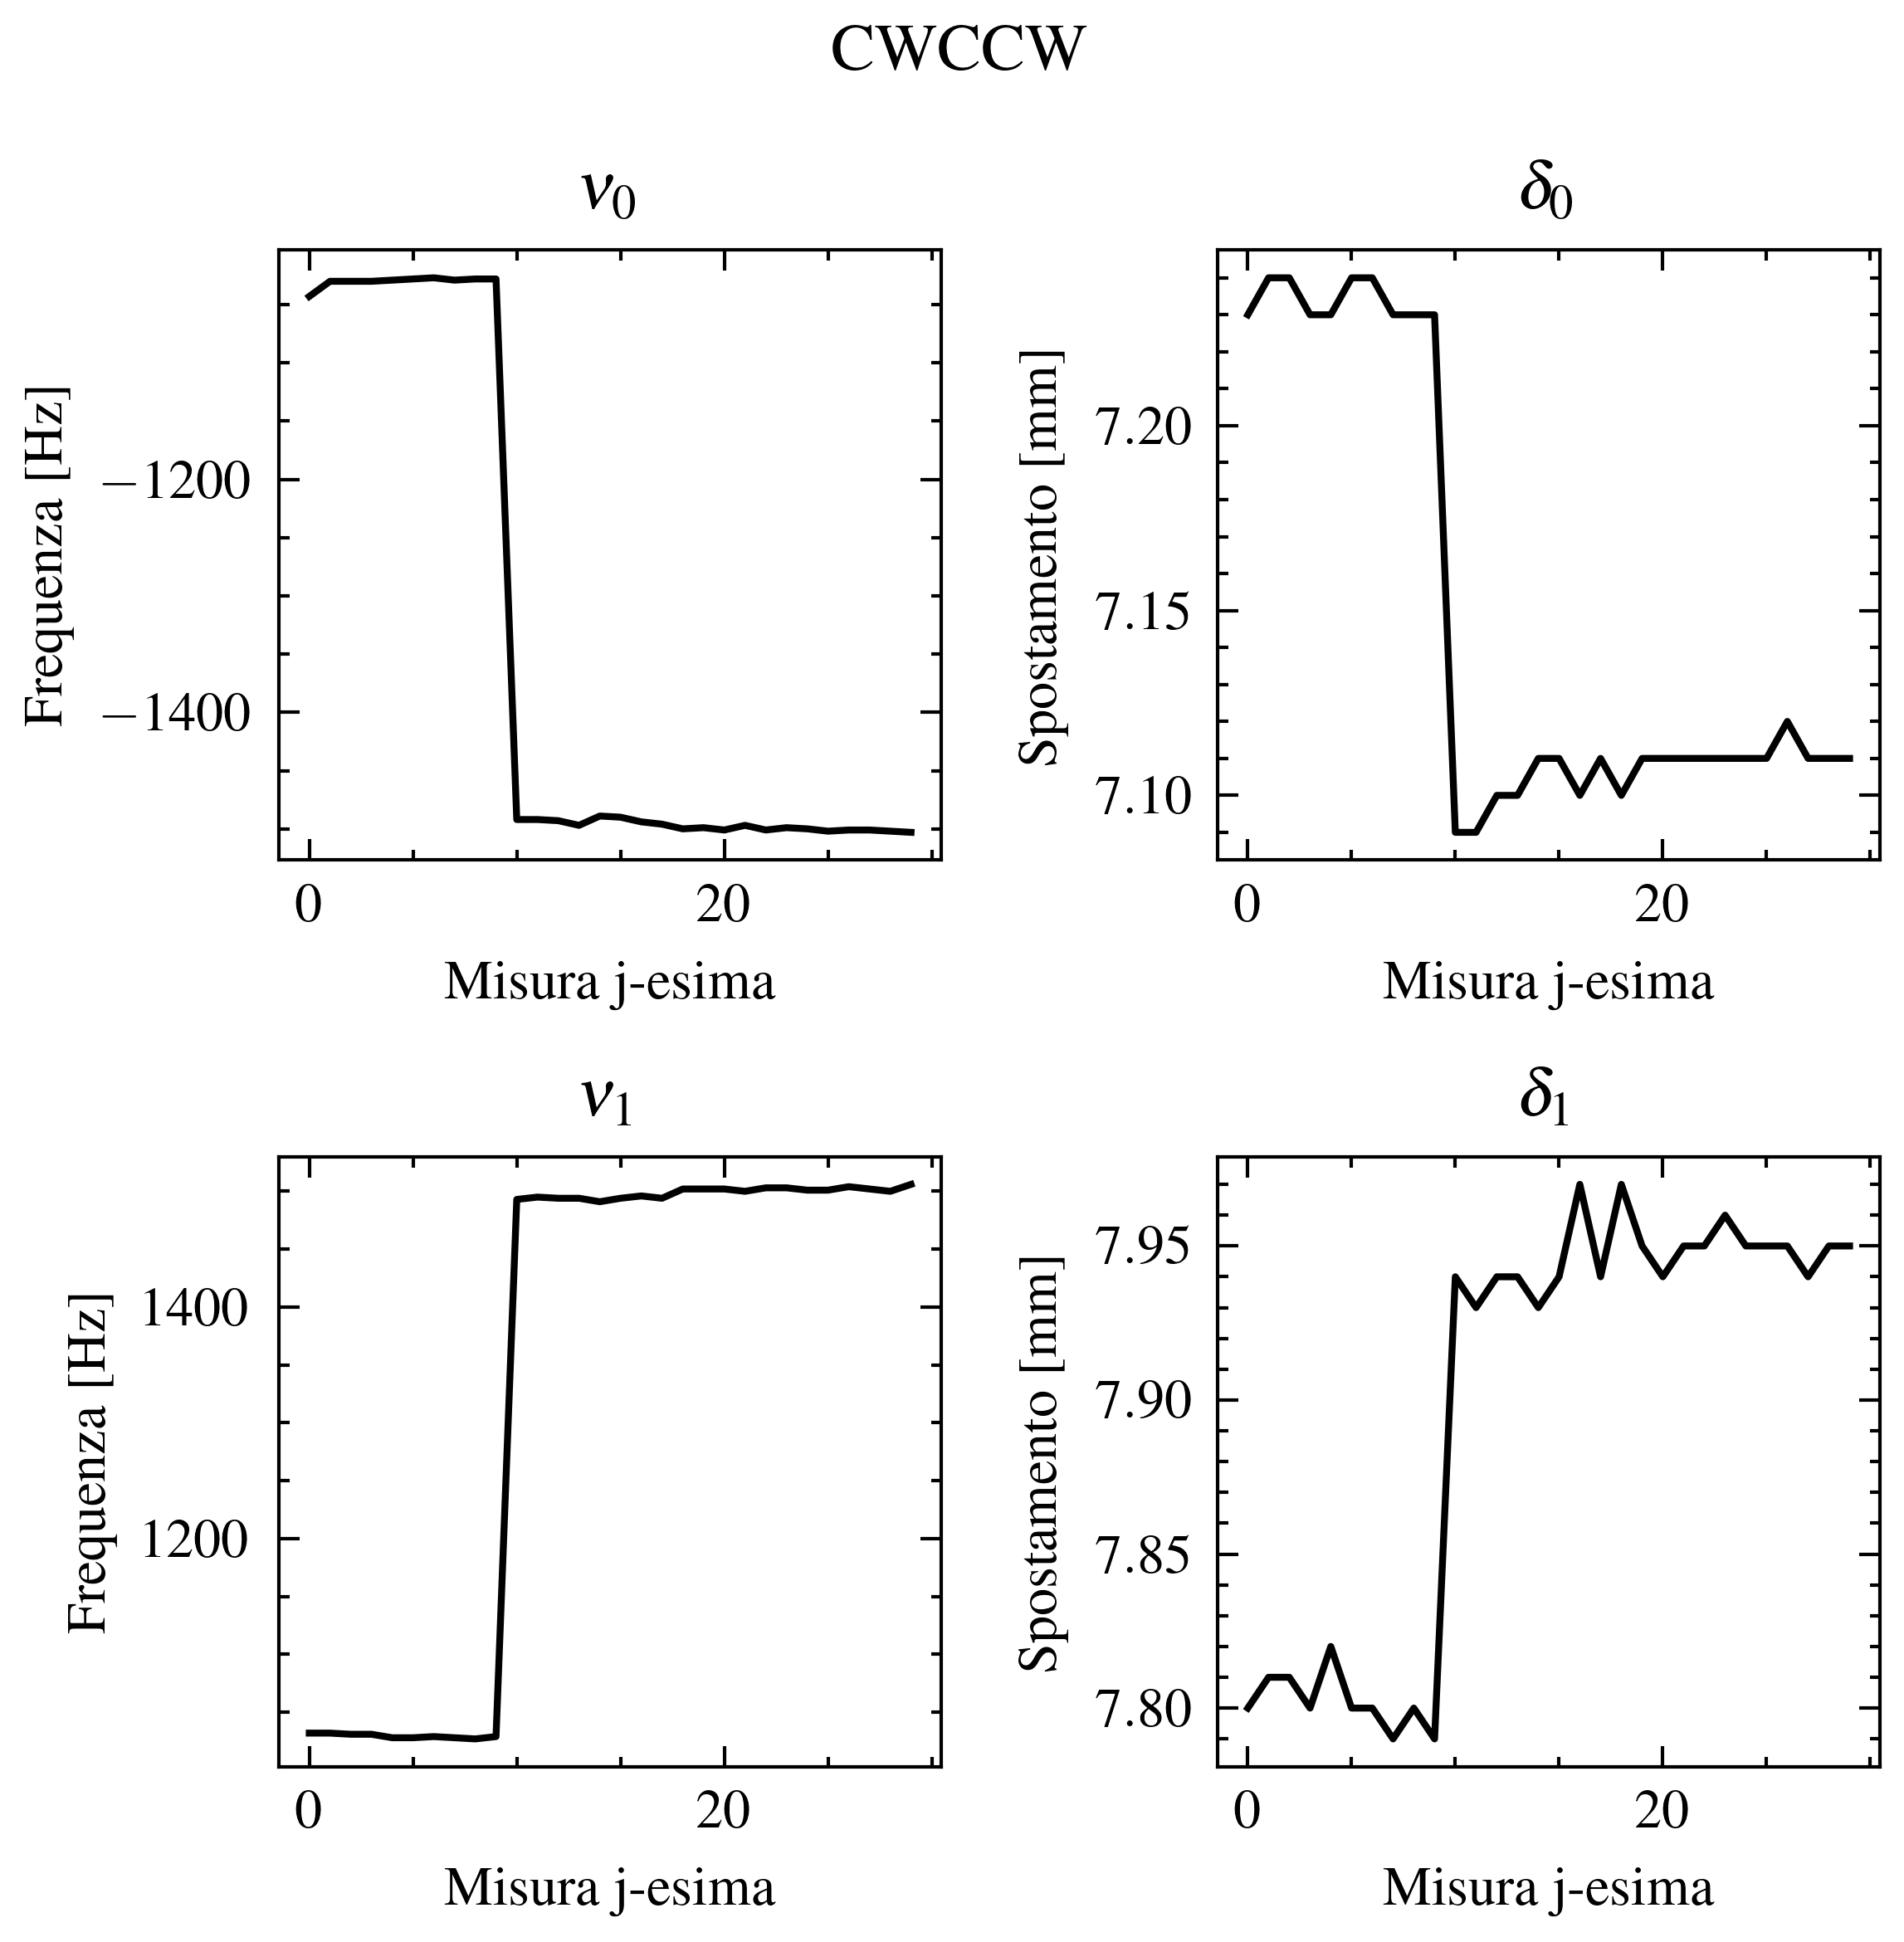

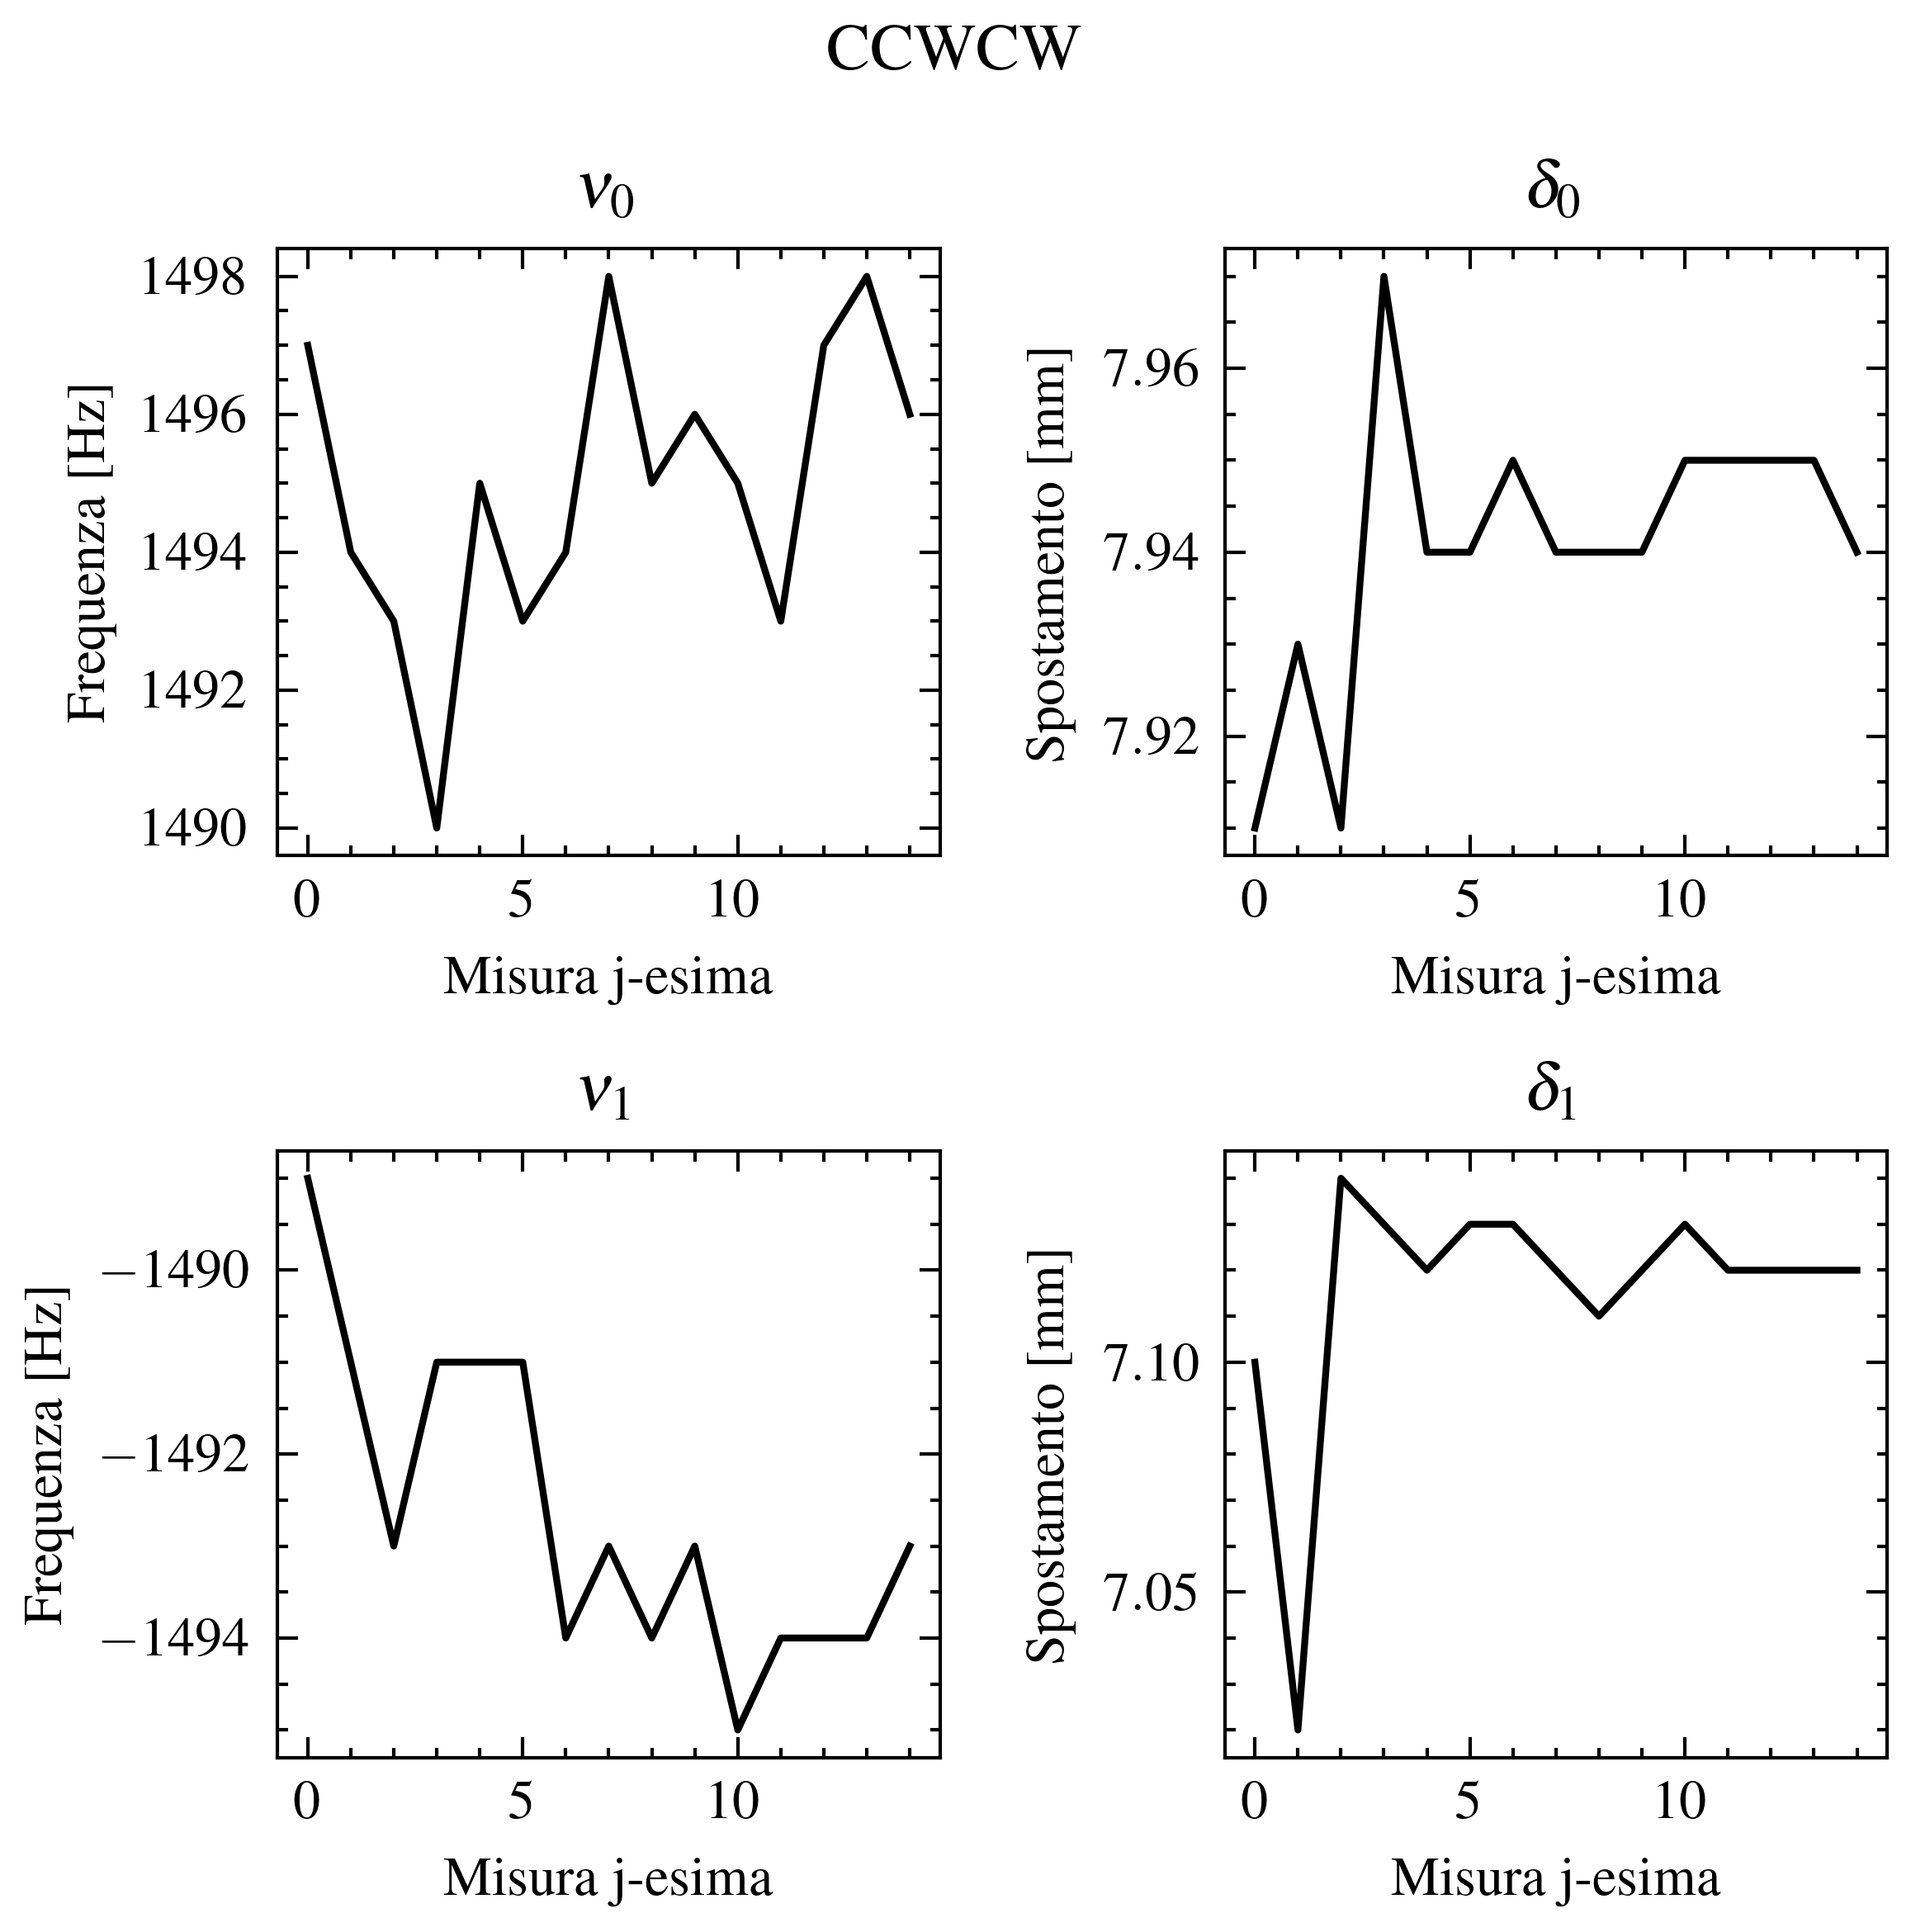

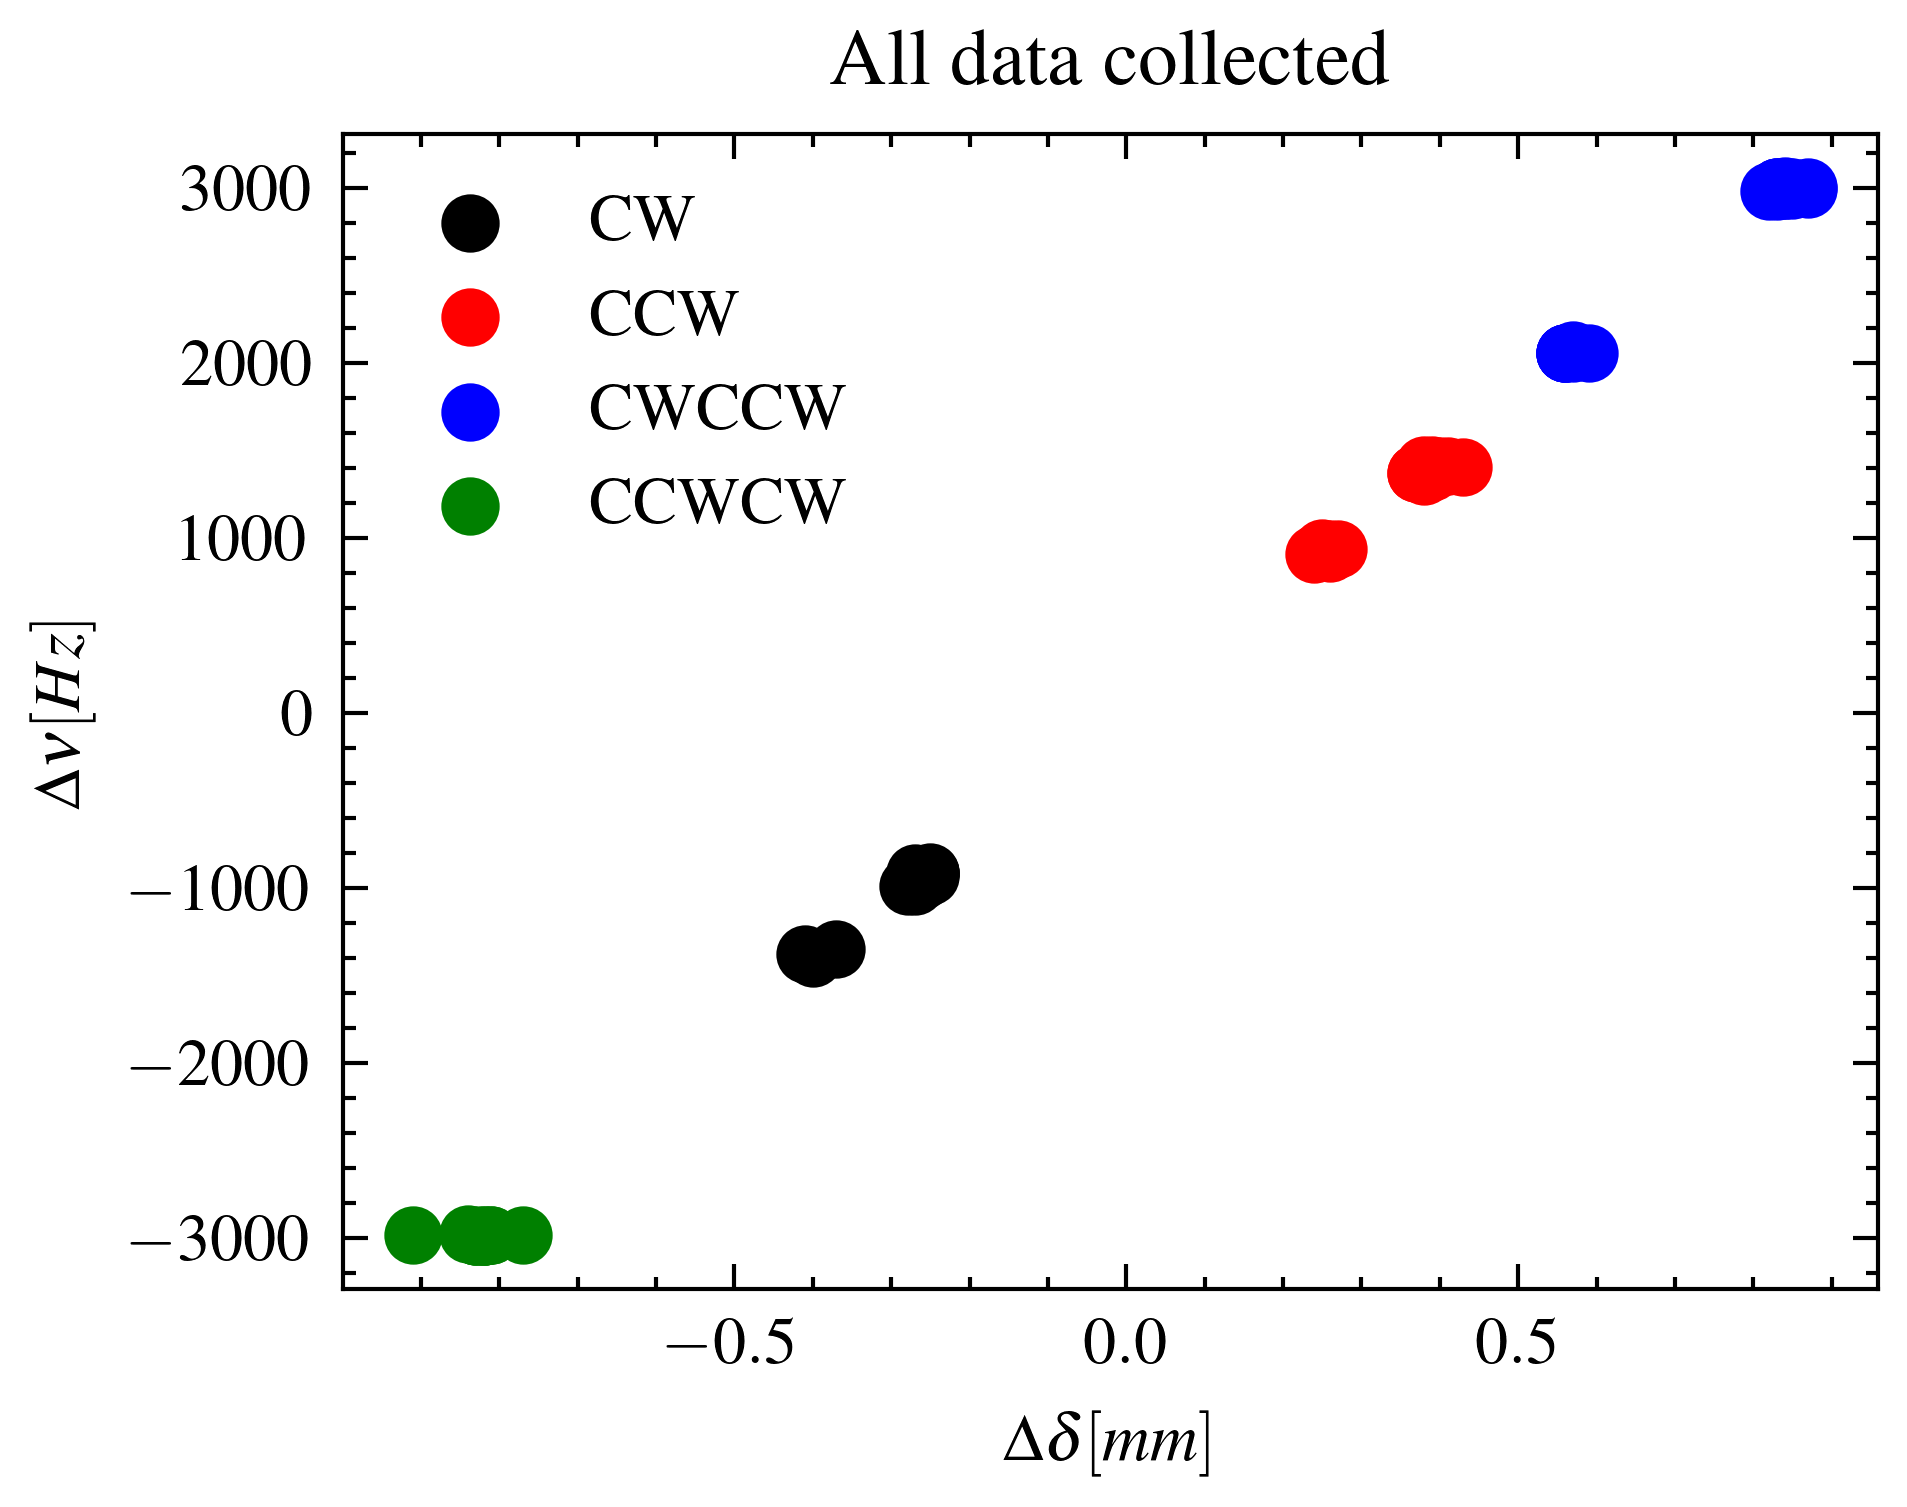

In [5]:
plot_titles = [r"$\nu_0$", r"$\delta_0$", r"$\nu_1$", r"$\delta_1$"]
y_labels = ["Frequenza [Hz]", "Spostamento [mm]", "Frequenza [Hz]", "Spostamento [mm]"]

for set_name, set_data in data_dict.items():
    fig, axs = plt.subplots(2, 2, figsize=(4, 4))
    fig.suptitle(set_name)
    for i in range(4):
        row, col = divmod(i, 2)
        axs[row, col].plot(set_data[i, :])
        axs[row, col].set_title(plot_titles[i])
        axs[row, col].set_xlabel("Misura j-esima")
        axs[row, col].set_ylabel(y_labels[i])

    fig.tight_layout()  # rect=[0, 0, 1, 0.95]

fig = plt.subplots()
for set_name, set_data in data_dict.items():
    plt.scatter(
        set_data[3, :] - set_data[1, :], set_data[2, :] - set_data[0, :], label=set_name
    )
plt.title("All data collected")
plt.xlabel(r"$\Delta\delta [mm]$")
plt.ylabel(r"$\Delta\nu [Hz]$")
plt.legend(loc="best")
# plt.savefig("Images/AllData.svg")
plt.show()

## Analisi Statistica

Calcoliamo la differenza di spostamento:
$$
    \Delta \delta = \delta_1 - \delta_0
$$

Dalle frequenze misurate possiamo trovare la velocità angolare dello specchio rotante tramite:
$$
    \Delta \omega = 2 \pi \Delta \nu = 2 \pi (\nu_1 -\nu_0)
$$

Da queste due possiamo calcolare il valore di $c$ tramite:
$$
    c = \frac{4 f_2 D^2}{(D + a - f_2)^2} \frac{\Delta \omega}{\Delta \delta}
$$

In [6]:
c_means, c_errs = list(), list()

for set_name, set_data in data_dict.items():
    dv = set_data[2, :] - set_data[0, :]
    dd = (set_data[3, :] - set_data[1, :]) / 1000  # convert to meters
    dw = dv * 2 * np.pi

    # questo sarebbe da spostare su dove grafichiamo i dati se non printiamo direttamente tutto prima
    print(Style.BRIGHT + Fore.GREEN + f" ~~~~~ {set_name}" + Style.RESET_ALL)
    print("differenze di " + Style.BRIGHT + "frequenza" + Style.NORMAL + ": ", dv)
    print(
        "differenze di " + Style.BRIGHT + "velocità angolare" + Style.NORMAL + ": ", dw
    )
    print("differenze di " + Style.BRIGHT + "spostamento" + Style.NORMAL + ": ", dd)

    c = 4 * f2 * D**2 / (D + a - f2) * dw / dd
    print(
        Style.BRIGHT + "velocità della luce" + Style.NORMAL + " nell'aria misurate: ", c
    )

    mean_c = c.mean()

    # * errore casuale
    std_c = c.std(ddof=1) / np.sqrt(c.size)

    c_means.append(mean_c)
    c_errs.append(std_c)
    print(
        "Miglior valore di c: "
        + Fore.CYAN
        + Style.BRIGHT
        + f"{mean_c:.6g} ±{std_c:.5g}"
    )

 ~~~~~ CW
differenze di frequenza:  [ -975.  -992.  -992.  -944.  -934.  -943.  -915.  -931.  -927.  -915.
  -911.  -956.  -916. -1404. -1353. -1379.]
differenze di velocità angolare:  [-6126.1056745  -6232.91982472 -6232.91982472 -5931.32692998
 -5868.49507691 -5925.04374467 -5749.11455607 -5849.64552098
 -5824.51277976 -5749.11455607 -5723.98181484 -6006.72515366
 -5755.39774138 -8821.59217128 -8501.14972061 -8664.5125386 ]
differenze di spostamento:  [-0.00027  -0.000278 -0.00027  -0.00026  -0.00025  -0.00026  -0.00025
 -0.00026  -0.00026  -0.00027  -0.00025  -0.00026  -0.00025  -0.0004
 -0.00037  -0.00041 ]
velocità della luce nell'aria misurate:  [3.01015642e+08 2.97450764e+08 3.06264120e+08 3.02654307e+08
 3.11426152e+08 3.02333699e+08 3.05090931e+08 2.98486398e+08
 2.97203965e+08 2.82491603e+08 3.03757200e+08 3.06501608e+08
 3.05424364e+08 2.92587204e+08 3.04820580e+08 2.80368115e+08]
Miglior valore di c: 2.99867e+08 ±2.1228e+06
 ~~~~~ CCW
differenze di frequenza:  [ 927.  941. 

Uniamo i 4 set in un unico valore finale utilizzando la media pesata.

E consideriamo l'errore sistematico dovuto a $a$ e $D$.

In [7]:
c_mean, c_std = weighted_avg_and_std(c_means, c_errs)

# aggiungo l'errore sistematico
alpha = mean_c / (D * (D + a - f2))  # (4 * f2 * D * dw) / abs((D + a - f2) ** 2 * dd)
e_sist = alpha * np.sqrt(
    np.square(-D * a_err)  # errore dovuto ad a
    + np.square((D + 2 * a - 2 * f2) * D_err)  # errore dovuto a D
)

c_std = np.sqrt(np.square(c_std) + np.square(e_sist))

print(
    Fore.GREEN
    + Style.BRIGHT
    + "Valore finale di c: "
    + Fore.RED
    + f"{c_mean:.6g} ±{c_std:.3g}m/s"
)

na = 1.000283
print(
    Fore.GREEN
    + "Valore finale di c nel vuoto: "
    + Fore.RED
    + f"{c_mean * na:.6g} ±{c_std * na:.3g}m/s"
)

Valore finale di c: 2.99608e+08 ±8.57e+05m/s
Valore finale di c nel vuoto: 2.99693e+08 ±8.57e+05m/s


### Statistical values

In [8]:
# norm-test
z_value = abs(c_mean - 299_792_458) / c_std
p_student = stats.norm.cdf(z_value)
p_value = 2 * (1 - p_student)

print(f"P-value di c nell'aria compatibile con c vero: {p_value:.2%}")

P-value di c nell'aria compatibile con c vero: 82.99%
